In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3504.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3926.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3721.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3851.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3749.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3975.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3223.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3577.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3615.txt
/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels/3931.txt


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 16.9 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO

# Build a YOLOv6n model from scratch
model = YOLO("yolov6s.yaml")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
model.train(data="/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml", batch=16, cos_lr=True, verbose=True, epochs=30, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv6s summary: 121 layers, 16,452,192 parameters, 16,452,176 gradients, 44.9 GFLOPs
Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov6s.yaml, data=/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scal

100%|██████████| 755k/755k [00:00<00:00, 18.6MB/s]


Overriding model.yaml nc=80 with nc=14
activation: torch.nn.ReLU()

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  2     73984  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 1]                
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  4    590848  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 1]              
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  6   3542016  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 1]              
  7                 

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/train/labels... 3200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3200/3200 [00:17<00:00, 181.00it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:04<00:00, 176.65it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 53 weight(decay=0.0), 62 weight(decay=0.0005), 61 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.57G      3.311      4.624       3.69         91        640: 100%|██████████| 200/200 [00:57<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.78it/s]

                   all        800       2877     0.0507      0.181     0.0324     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.77G      2.133      2.903      2.272        117        640: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]

                   all        800       2877      0.149      0.239      0.116     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.78G      1.837      2.412      1.887        128        640: 100%|██████████| 200/200 [00:55<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]

                   all        800       2877      0.241      0.328      0.211      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.78G      1.628      2.087      1.672        119        640: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]

                   all        800       2877      0.335      0.365      0.301      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.78G      1.492      1.861      1.549        104        640: 100%|██████████| 200/200 [00:55<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]

                   all        800       2877      0.323      0.444      0.318      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.78G      1.411      1.726       1.47         90        640: 100%|██████████| 200/200 [00:55<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]

                   all        800       2877      0.421       0.45       0.42      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.78G      1.346      1.598      1.415         96        640: 100%|██████████| 200/200 [00:55<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]

                   all        800       2877      0.515      0.483       0.48       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.78G      1.296      1.529      1.374        110        640: 100%|██████████| 200/200 [00:54<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.15it/s]

                   all        800       2877      0.514      0.515      0.494      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.78G      1.253      1.428      1.341         87        640: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]

                   all        800       2877      0.538      0.532       0.53      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.78G      1.209      1.358      1.299        166        640: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.17it/s]

                   all        800       2877      0.578      0.548      0.559      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.78G      1.165      1.292      1.274        123        640: 100%|██████████| 200/200 [00:56<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.35it/s]

                   all        800       2877      0.597      0.558      0.592      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.78G      1.146      1.237      1.261        128        640: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]

                   all        800       2877      0.604      0.607      0.607      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.78G      1.108      1.166      1.235         95        640: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]

                   all        800       2877      0.628      0.593      0.624      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.78G      1.079      1.142      1.216         93        640: 100%|██████████| 200/200 [00:55<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.29it/s]

                   all        800       2877       0.64      0.632       0.63      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.78G      1.065      1.096      1.211        103        640: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]

                   all        800       2877      0.694      0.595      0.654      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.78G      1.039       1.05      1.189         78        640: 100%|██████████| 200/200 [00:55<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.26it/s]

                   all        800       2877      0.717      0.663      0.714      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.78G      1.016      1.024      1.173         76        640: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]

                   all        800       2877      0.712      0.641      0.692      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.78G     0.9922     0.9808      1.154        112        640: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.29it/s]

                   all        800       2877      0.744      0.664      0.739      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.78G     0.9813     0.9744      1.158         95        640: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]

                   all        800       2877      0.734      0.682      0.731      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.78G     0.9659     0.9387      1.136         73        640: 100%|██████████| 200/200 [00:55<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.37it/s]

                   all        800       2877      0.759      0.676      0.743      0.573


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.78G     0.9134     0.8653       1.11         42        640: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.48it/s]

                   all        800       2877      0.714      0.678      0.742      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.78G     0.8902     0.8184      1.097         42        640: 100%|██████████| 200/200 [00:55<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.31it/s]

                   all        800       2877       0.73      0.725      0.769      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.78G     0.8712     0.8078      1.085         56        640: 100%|██████████| 200/200 [00:53<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.55it/s]

                   all        800       2877      0.789      0.707      0.775      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.78G     0.8571     0.7842      1.077         47        640: 100%|██████████| 200/200 [00:53<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.43it/s]

                   all        800       2877       0.78      0.724       0.79      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.78G     0.8445     0.7583      1.065         58        640: 100%|██████████| 200/200 [00:54<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.36it/s]

                   all        800       2877      0.805      0.727      0.802      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.78G     0.8319     0.7447      1.059         51        640: 100%|██████████| 200/200 [00:54<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.46it/s]

                   all        800       2877      0.809      0.728      0.803      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.78G     0.8211     0.7329      1.055         72        640: 100%|██████████| 200/200 [00:53<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]

                   all        800       2877      0.825      0.732      0.813      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.78G     0.8121     0.7089      1.048         46        640: 100%|██████████| 200/200 [00:54<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]

                   all        800       2877      0.835       0.73      0.815      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.78G     0.8081     0.7127       1.05         69        640: 100%|██████████| 200/200 [00:53<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]

                   all        800       2877      0.841      0.738      0.824      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.78G     0.8069     0.7069      1.052         63        640: 100%|██████████| 200/200 [00:54<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.36it/s]

                   all        800       2877       0.83      0.732      0.821      0.665



30 epochs completed in 0.532 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 32.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 32.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.89 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv6s summary (fused): 68 layers, 16,300,154 parameters, 0 gradients, 44.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]


                   all        800       2877      0.841      0.738      0.824      0.668
                  trak        113        120      0.827      0.892      0.919      0.824
               cyclist        188        234      0.803      0.714       0.76      0.555
                  bike        340        486       0.96       0.75      0.873      0.662
                 tempo        123        134       0.84      0.746      0.821      0.663
                   car        307        524      0.923      0.733      0.864      0.678
                  zeep         78         79      0.812      0.494      0.689      0.608
                  toto         63         66      0.838      0.879      0.914      0.776
            e-rickshaw         53         54      0.911      0.942      0.937      0.817
         auto-rickshaw        145        192      0.847      0.646      0.771      0.575
                   bus         83         91      0.887      0.774      0.828      0.684
                   va

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7faf45cbc040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0


image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3480.jpg: 384x640 1 cyclist, 1 van, 33.9ms
Speed: 2.0ms preprocess, 33.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3415.jpg: 384x640 1 car, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3809.jpg: 384x640 (no detections), 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images/3884.jpg: 384x640 1 cycle-rickshaw, 3 persons, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/iruvd-dataset-for-automatic-vehicle-dete

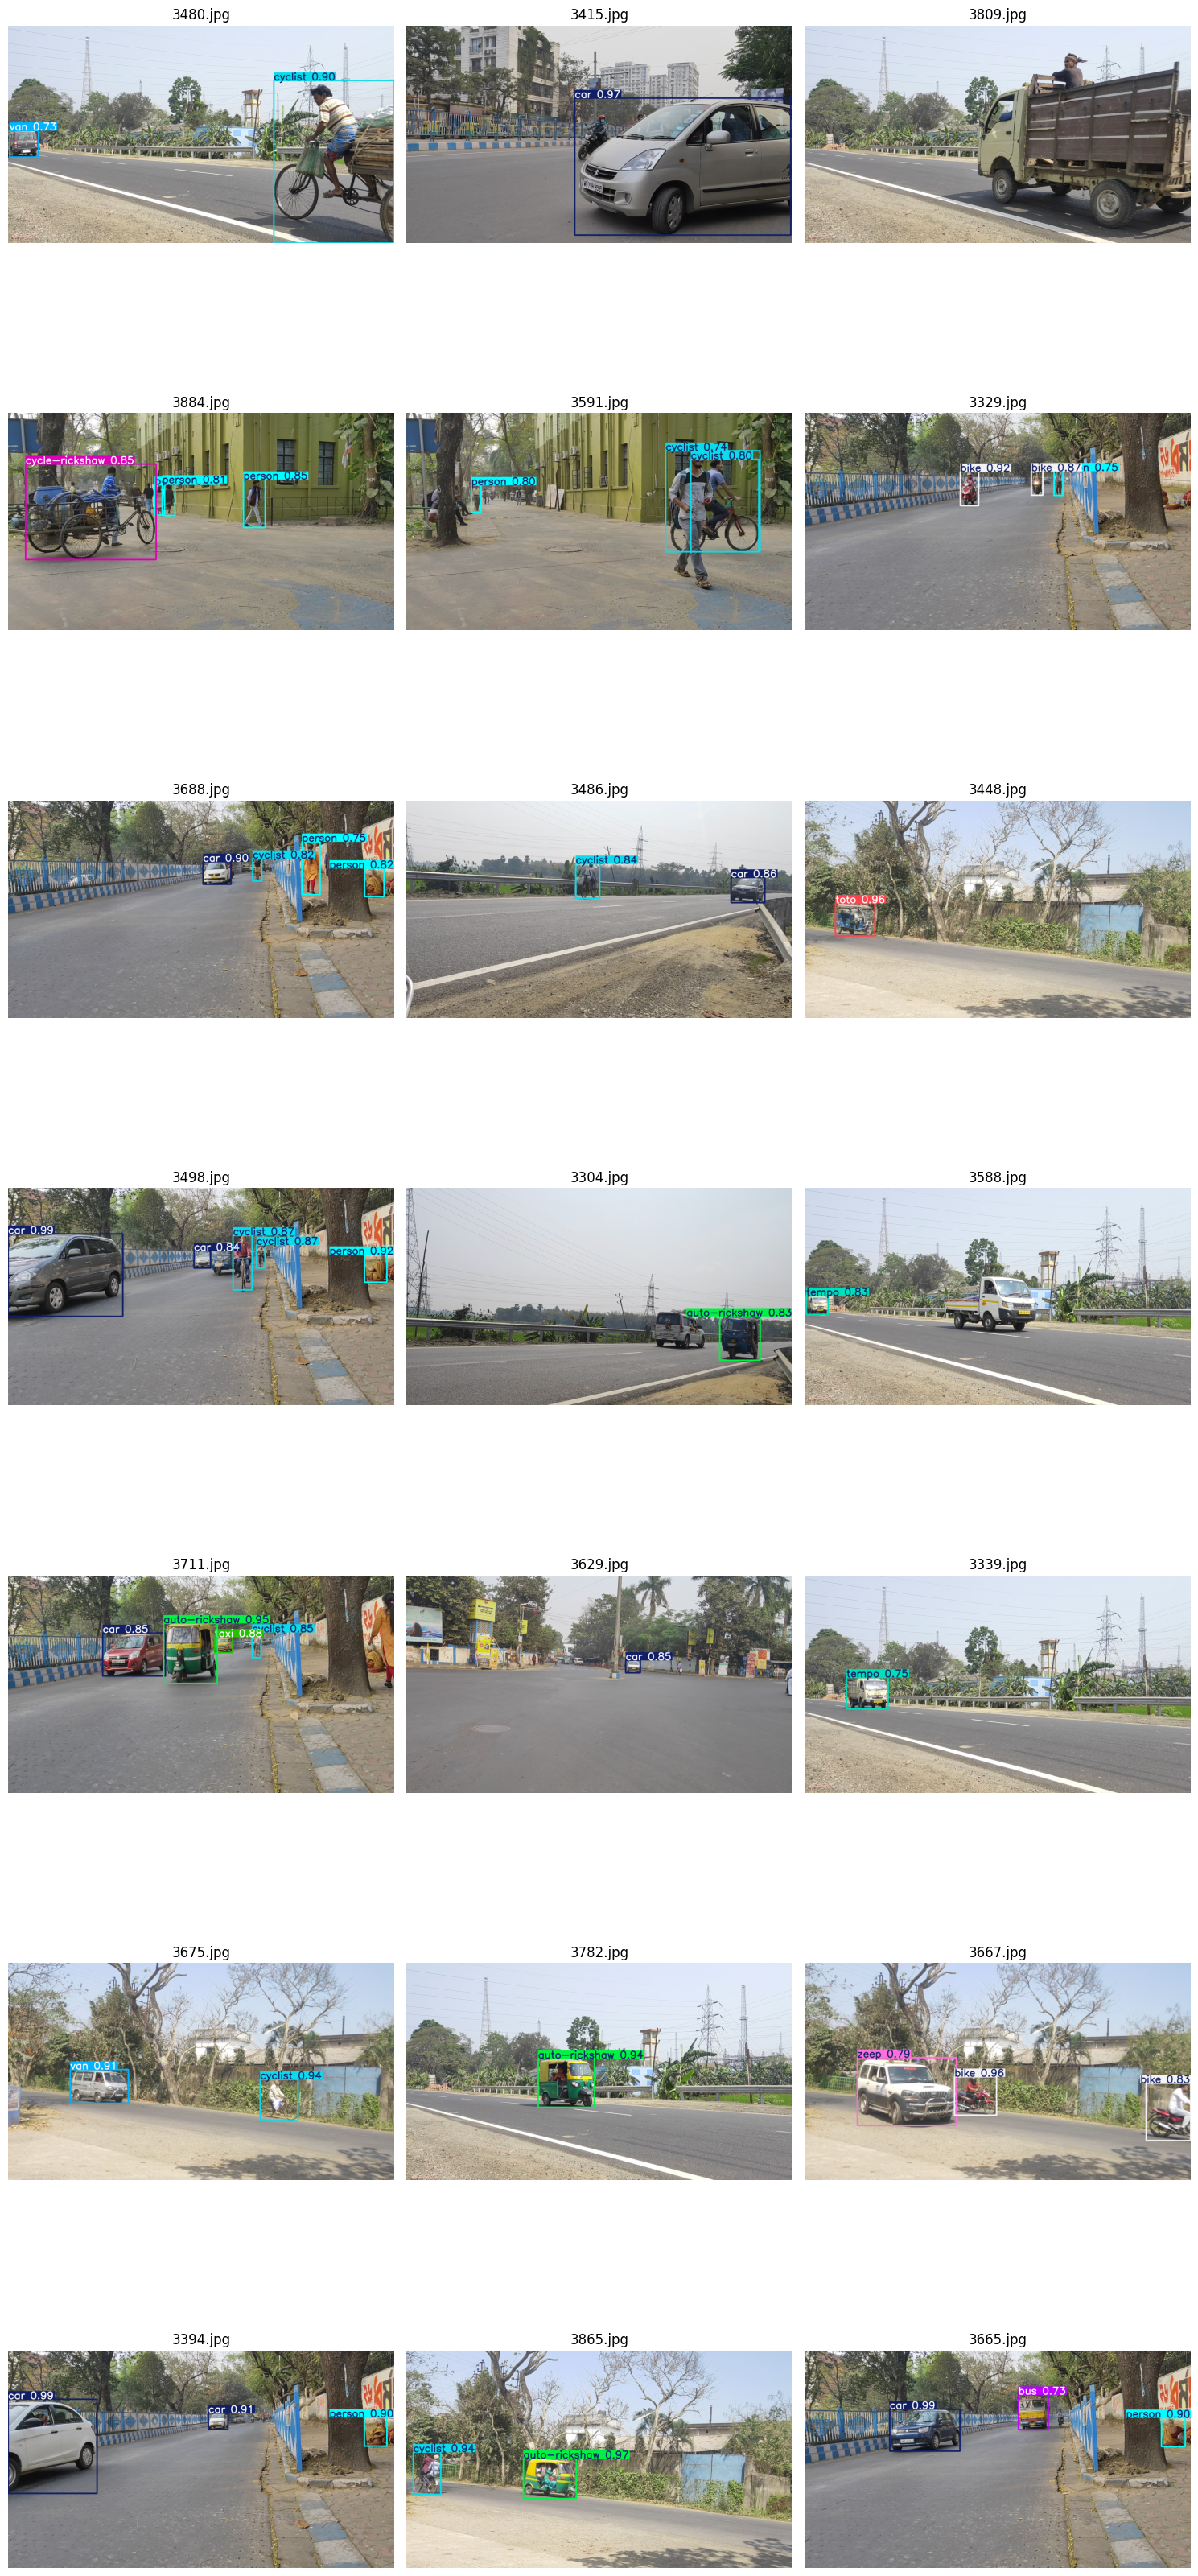

In [5]:
import os
import random
import cv2
import numpy as np
from IPython.display import display, Image
from tqdm import tqdm 
import random
import matplotlib.pyplot as plt
import yaml
import shutil

def run_yolov6(image_dir, model_path, total_image=21, output_folder="/kaggle/working/result_vis"):
    # Load the YOLOv6 model
    model = YOLO(model_path)
    
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop through all images in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    
    # Select the specified number of random images or all images if total_image is -1
    if total_image == -1:
        selected_files = image_files
    else:
        selected_files = random.sample(image_files, min(total_image, len(image_files)))

    result_images = []  # List to hold result images

    for image_file in selected_files:
        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)

        # Run YOLOv11 segmentation prediction
        results = model.predict(image_path, conf=0.7, iou=0.7)
        
        # Get the segmented mask and draw it on the image
        result_image = results[0].plot()
        
        # Save the result image in the output folder
        output_image_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_image_path, result_image)
        
        # Append the result image to the list
        result_images.append(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB

    # Display all result images in a grid
    num_images = len(result_images)
    cols = 3  # Number of columns for the grid
    rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed

    plt.figure(figsize=(15, 5 * rows))  # Adjust the figure size as needed
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(result_images[i])
        plt.axis('off')
        plt.title(selected_files[i])  # Optionally add titles

    plt.tight_layout()
    plt.show()



run_yolov6("/kaggle/input/iruvd-dataset-for-automatic-vehicle-detection/JU_yolov5/valid/images", model_path = "/kaggle/working/runs/detect/train/weights/best.pt")